# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
import warnings
warnings.filterwarnings(action='ignore')

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1.pkl

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = pd.read_csv('data1.csv')
data.head()

,Date,car_operation,booking_count,boarding_count,avg_wait_time,avg_fare,avg_distance,target,temp_max,temp_min,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,avg_wait_time_7,boarding_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,...,63.0,28.0,9.07,Thursday,1,Winter,2015,1.0,23.657143,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,...,73.0,37.0,8.66,Friday,1,Winter,2015,0.0,23.657143,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,...,89.0,58.0,5.32,Saturday,1,Winter,2015,0.0,23.657143,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,...,95.0,52.0,6.48,Sunday,1,Winter,2015,0.0,23.657143,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,...,98.0,29.0,10.47,Monday,1,Winter,2015,0.0,23.657143,0.877647


In [4]:
data.tail()

,Date,car_operation,booking_count,boarding_count,avg_wait_time,avg_fare,avg_distance,target,temp_max,temp_min,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,avg_wait_time_7,boarding_rate
2916,2022-12-26,603,5555,4605,39.2,2163,7889,44.4,3.0,-7.3,...,86.0,51.0,10.25,Monday,12,Winter,2022,0.0,43.485714,0.828983
2917,2022-12-27,669,5635,4654,44.4,2198,8178,44.8,-0.3,-5.4,...,92.0,40.0,10.86,Tuesday,12,Winter,2022,0.0,42.771429,0.825909
2918,2022-12-28,607,5654,4648,44.8,2161,7882,52.5,1.7,-7.8,...,71.0,34.0,10.88,Wednesday,12,Winter,2022,0.0,43.514286,0.822073
2919,2022-12-29,581,5250,4247,52.5,2229,8433,38.3,2.1,-4.0,...,87.0,38.0,10.84,Thursday,12,Winter,2022,0.0,42.957143,0.808952
2920,2022-12-30,600,5293,4200,38.3,2183,8155,33.7,-4.4,-4.4,...,66.0,66.0,0.00,Friday,12,Winter,2022,0.0,41.042857,0.793501


In [131]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2921 non-null   object 
 1   car_operation    2921 non-null   int64  
 2   booking_count    2921 non-null   int64  
 3   boarding_count   2921 non-null   int64  
 4   avg_wait_time    2921 non-null   float64
 5   avg_fare         2921 non-null   int64  
 6   avg_distance     2921 non-null   int64  
 7   target           2921 non-null   float64
 8   temp_max         2921 non-null   float64
 9   temp_min         2921 non-null   float64
 10  rain(mm)         2921 non-null   float64
 11  humidity_max(%)  2921 non-null   float64
 12  humidity_min(%)  2921 non-null   float64
 13  sunshine(MJ/m2)  2921 non-null   float64
 14  weekday          2921 non-null   object 
 15  month            2921 non-null   int64  
 16  season           2921 non-null   object 
 17  year          

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [8]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()

In [9]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
booking_count,2921.0,3926.20986,1509.649338,527.0,2162.0,4721.0,5110.0,6182.0


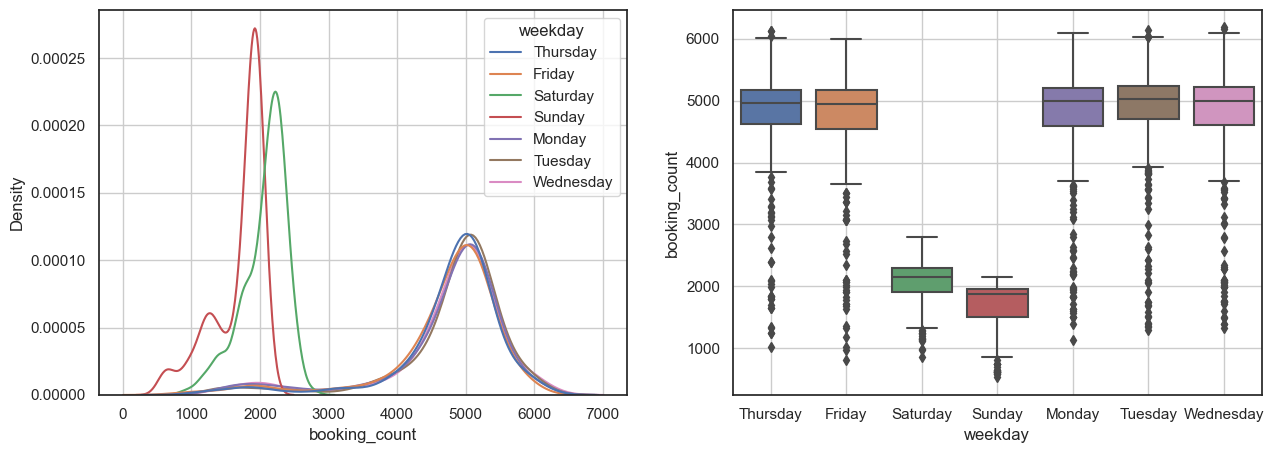

In [82]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'booking_count'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
booking_count,2921.0,3926.20986,1509.649338,527.0,2162.0,4721.0,5110.0,6182.0


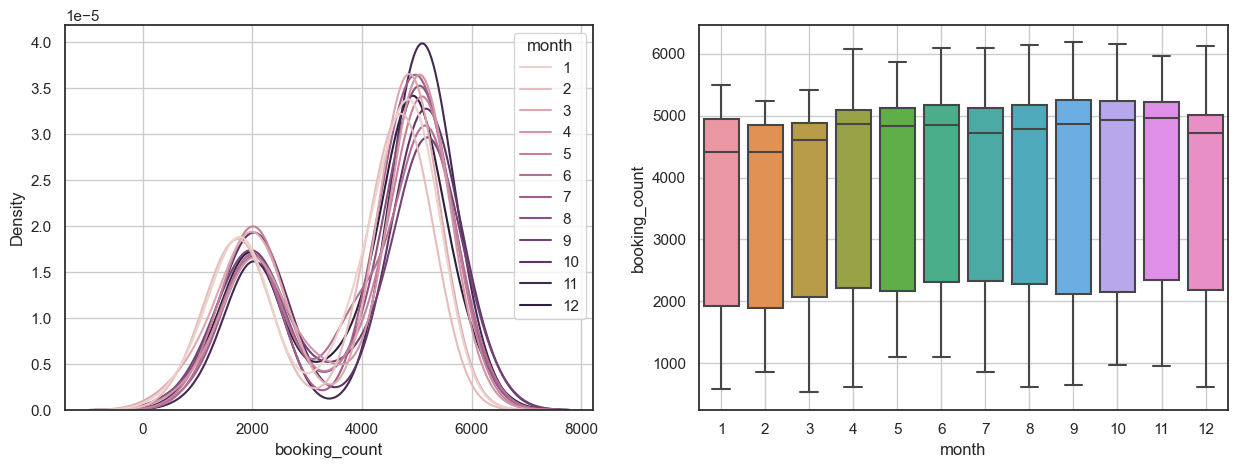

In [83]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'booking_count'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
booking_count,2921.0,3926.20986,1509.649338,527.0,2162.0,4721.0,5110.0,6182.0


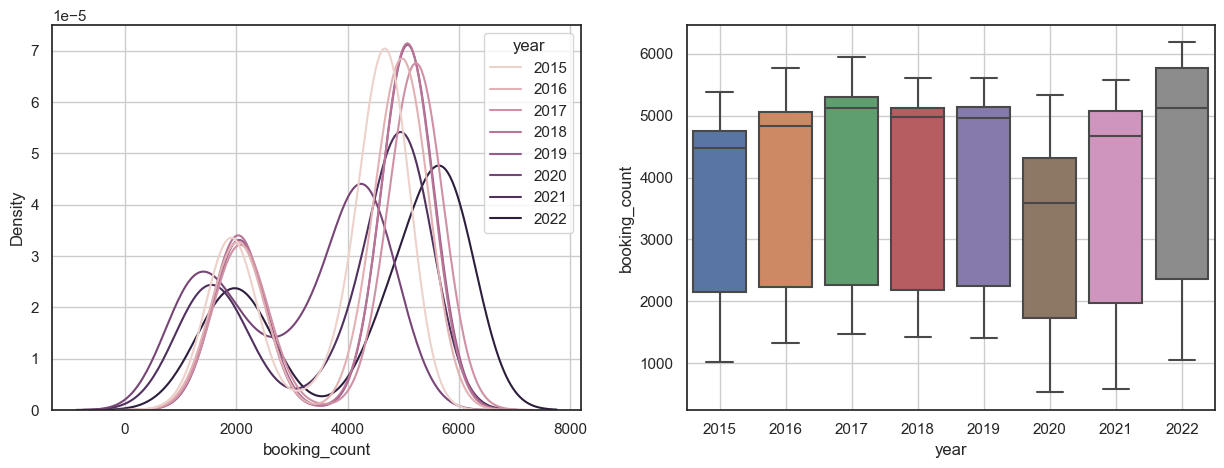

In [84]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'booking_count'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일의 접수건들이 주말보다 2.5배 정도 많음(2000, 5000)
- 월별 : 2000건과 5000건에 많이 분포, 5000건에 더 밀집되어 있다
- 연도별 : 연도가 지남에 따라 증가하다가 2020년 급격히 감소, 그 이후 다시 증가 (아마 코로나)

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
avg_wait_time,2921.0,40.307942,14.100434,17.2,29.6,38.2,48.6,96.1


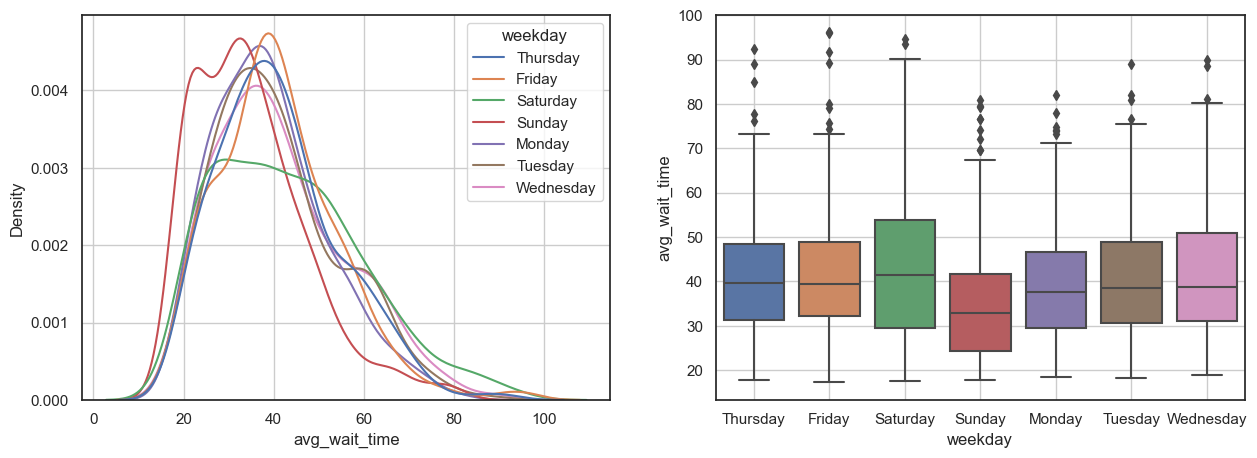

In [85]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_wait_time'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_wait_time,2921.0,40.307942,14.100434,17.2,29.6,38.2,48.6,96.1


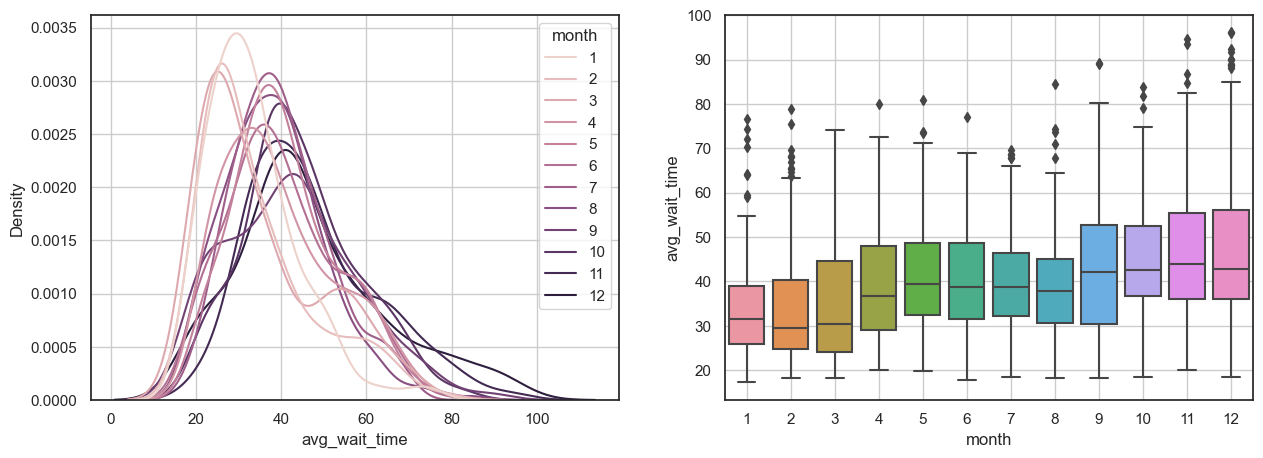

In [86]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_wait_time'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_wait_time,2921.0,40.307942,14.100434,17.2,29.6,38.2,48.6,96.1


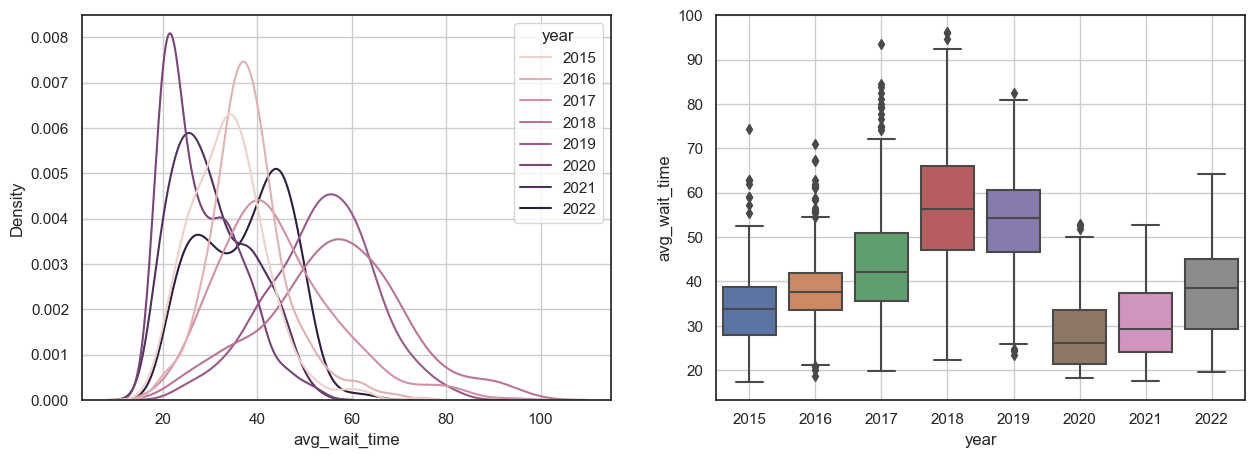

In [87]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_wait_time'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 토요일의 대기 시간이 많은 편이고, 일요일은 조금 적다
- 월별 : 겨울 여름 가을 순으로 증가
- 연도별 : 연도가 지남에 따라 증가하다가 2020년 급격히 감소, 그 이후 다시 증가 (아마 코로나)

#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
avg_fare,2921.0,2304.267717,107.278144,2131.0,2228.0,2257.0,2401.0,2733.0


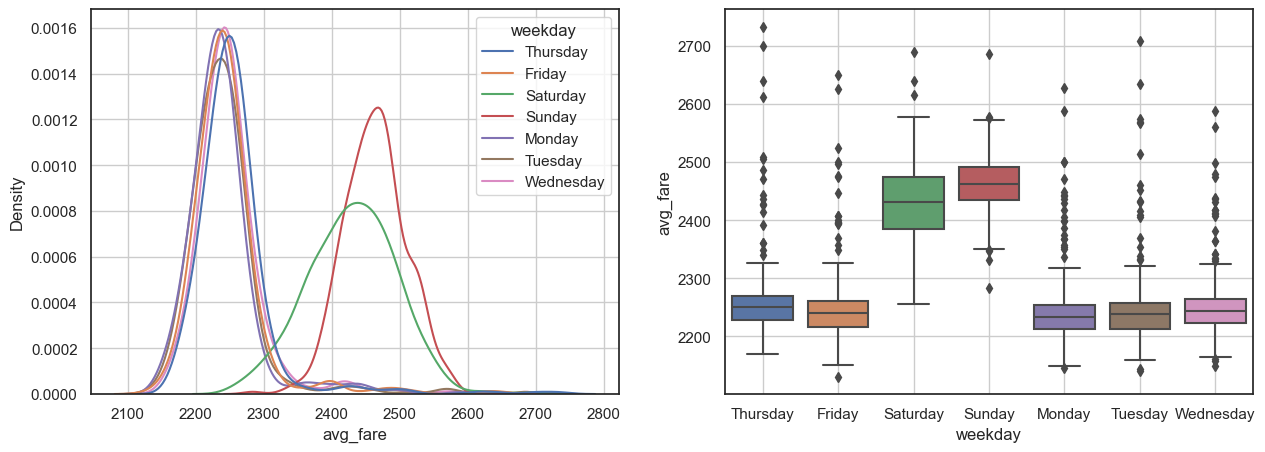

In [88]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_fare'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_fare,2921.0,2304.267717,107.278144,2131.0,2228.0,2257.0,2401.0,2733.0


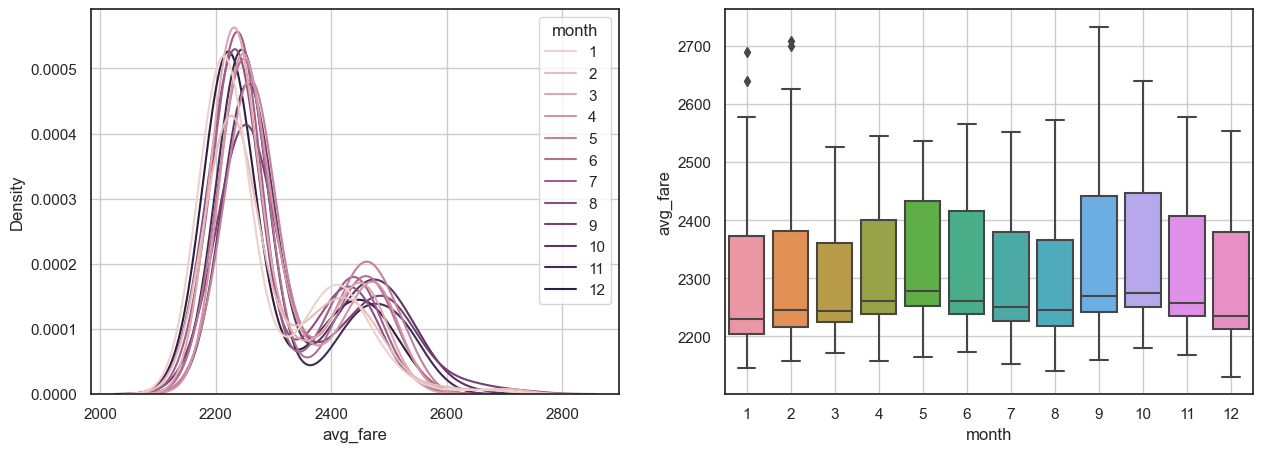

In [89]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_fare'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_fare,2921.0,2304.267717,107.278144,2131.0,2228.0,2257.0,2401.0,2733.0


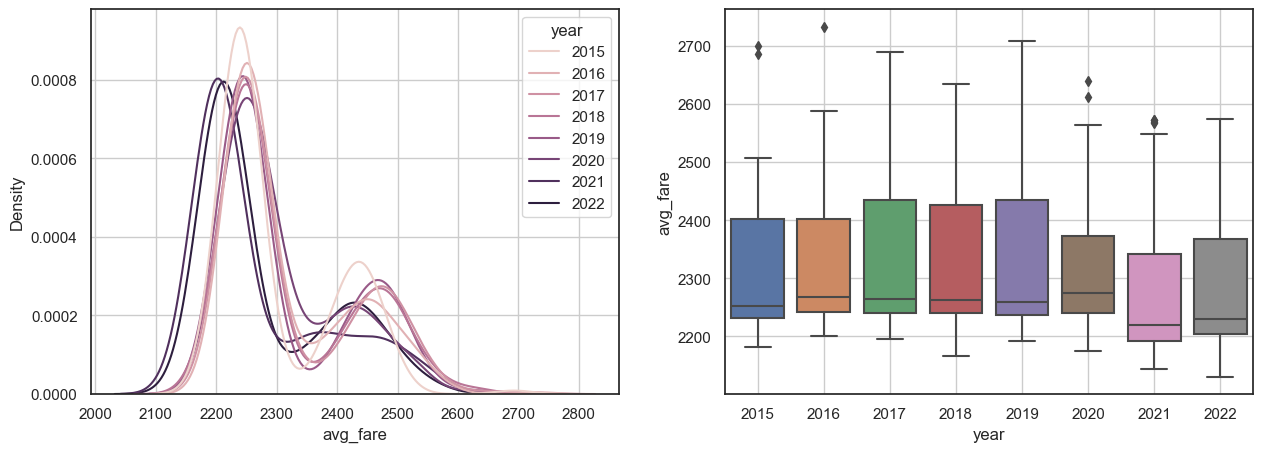

In [90]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_fare'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일보다 주말에 운임료를 많이 내는 편이다
- 월별 : 4 ~ 6월, 9~10월에 운임료를 많이 낸다
- 연도별 : 연도가 지남에 따라 증가하다가 2020년 급격히 감소, 그 이후 다시 증가 (아마 코로나)

#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
avg_distance,2921.0,9253.437864,1019.367122,7672.0,8521.0,8821.0,10154.0,14136.0


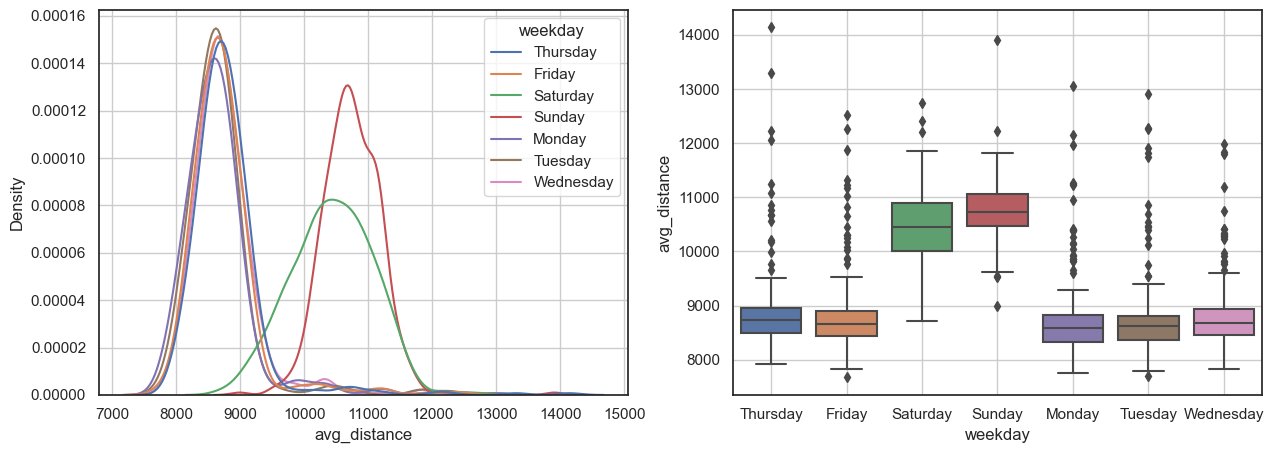

In [91]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_distance'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_distance,2921.0,9253.437864,1019.367122,7672.0,8521.0,8821.0,10154.0,14136.0


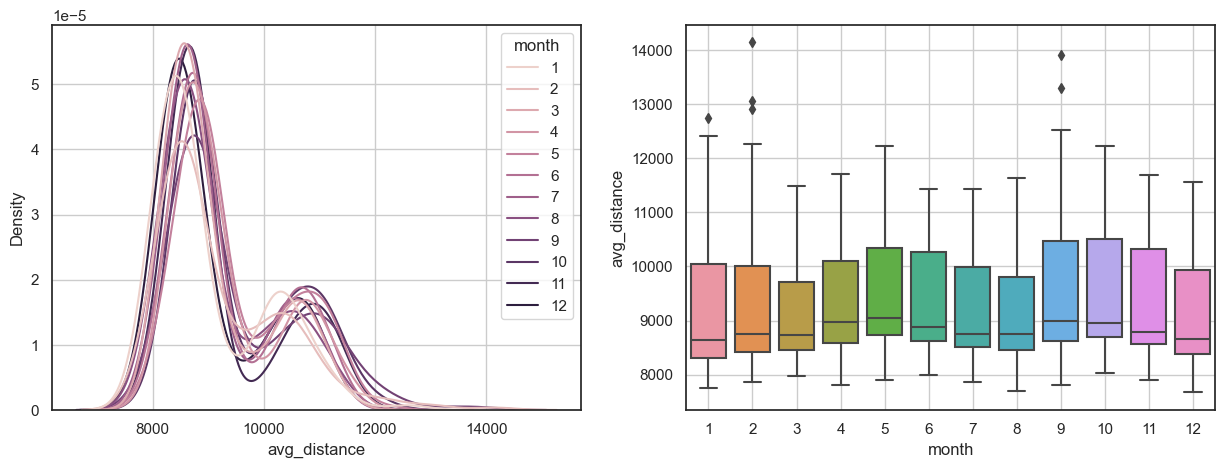

In [92]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_distance'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_distance,2921.0,9253.437864,1019.367122,7672.0,8521.0,8821.0,10154.0,14136.0


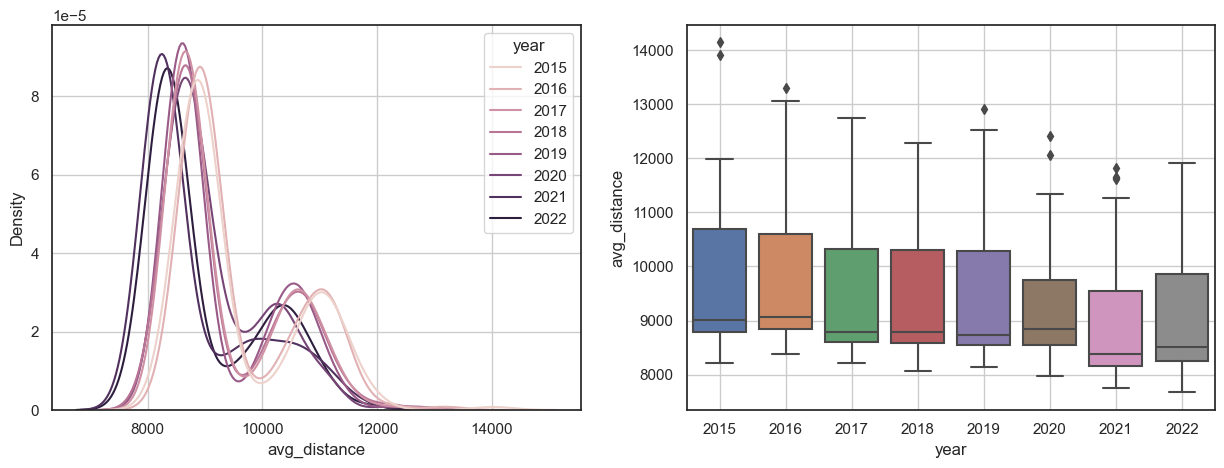

In [93]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_distance'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일보다 주말에 이동을 멀리 한다
- 월별 : 4 ~ 6월, 9~10월에 이동을 많이 한다
- 연도별 : 연도가 지남에 따라 감소하는 추세이다

#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
boarding_rate,2921.0,0.84158,0.052181,0.596996,0.805956,0.84566,0.877722,0.968844


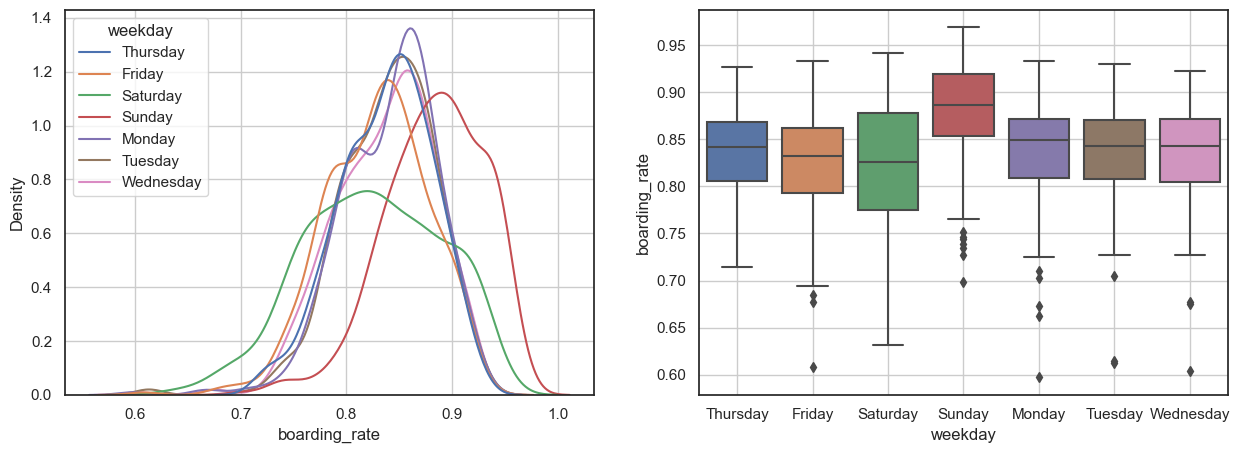

In [94]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'boarding_rate'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
boarding_rate,2921.0,0.84158,0.052181,0.596996,0.805956,0.84566,0.877722,0.968844


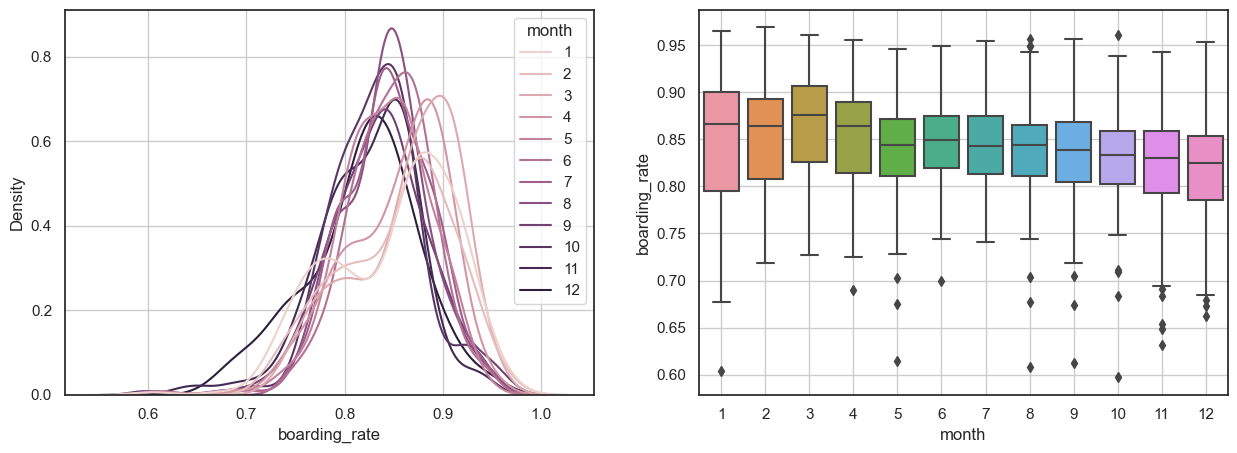

In [95]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'boarding_rate'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
boarding_rate,2921.0,0.84158,0.052181,0.596996,0.805956,0.84566,0.877722,0.968844


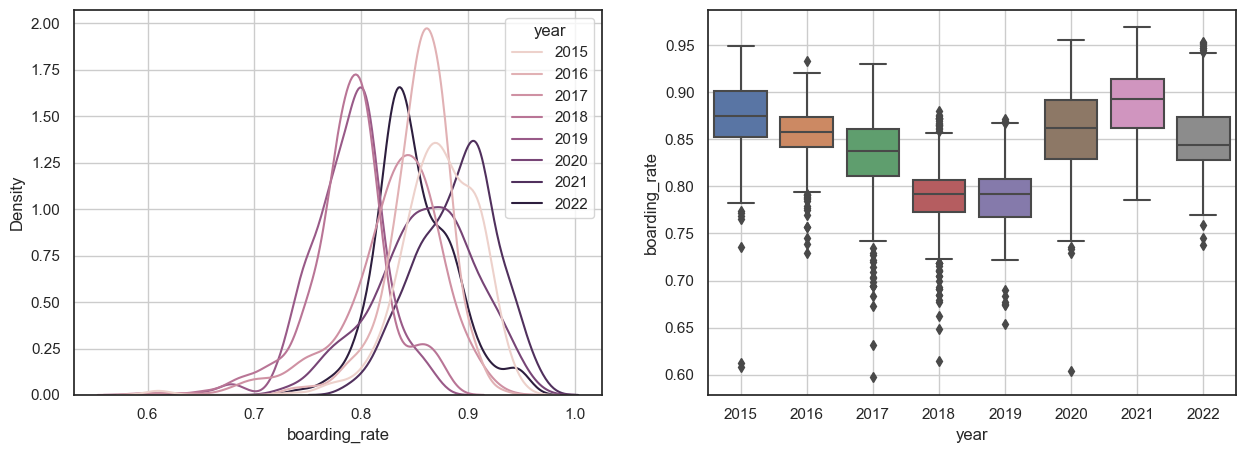

In [96]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'boarding_rate'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일의 탑승률이 주말보다 높음
- 월별 : 겨울에 탑승률이 높을 때가 많다
- 연도별 : 연도가 지남에 따라 감소하는 추세이다

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2921.0,18.077405,10.706655,-11.2,9.0,19.7,27.4,39.4


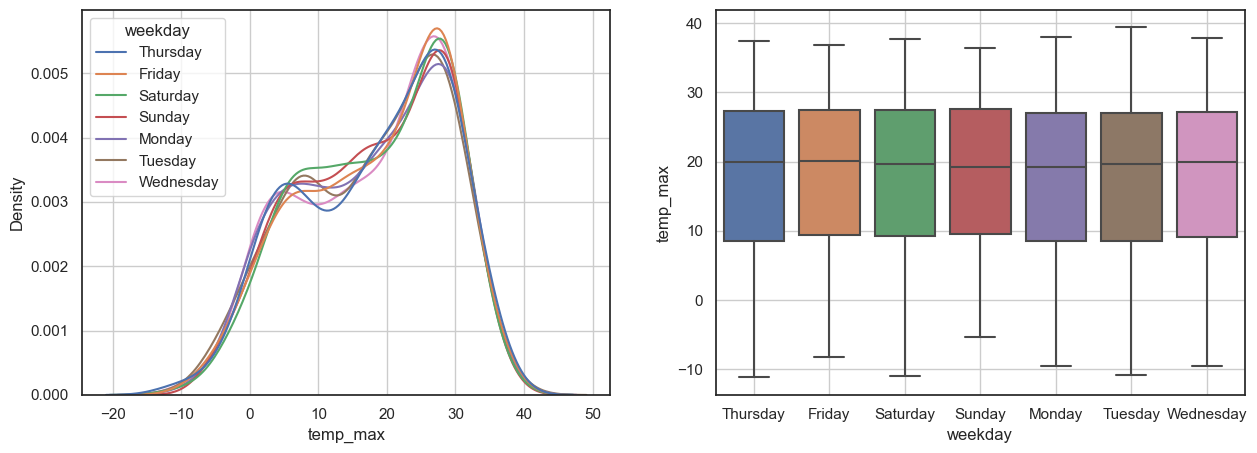

In [97]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'temp_max'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
temp_max,2921.0,18.077405,10.706655,-11.2,9.0,19.7,27.4,39.4


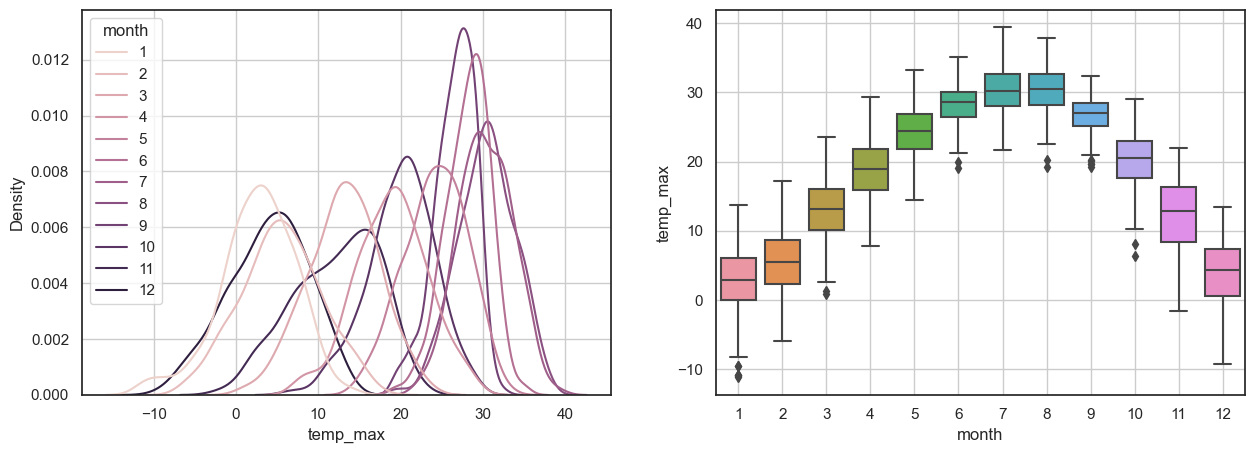

In [98]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'temp_max'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
temp_max,2921.0,18.077405,10.706655,-11.2,9.0,19.7,27.4,39.4


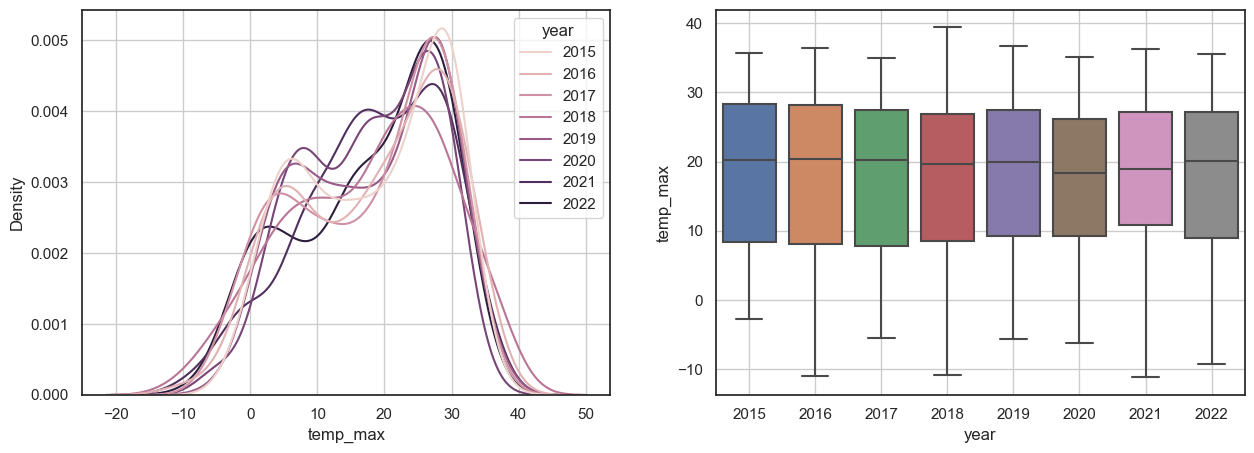

In [99]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'temp_max'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 거의 모든 요일 분포 비슷
- 월별 : 여름이 높고 겨울이 낮다
- 연도별 : 거의 모든 연도 비슷

#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2921.0,3.356761,12.597807,0.0,0.0,0.0,0.3,178.9


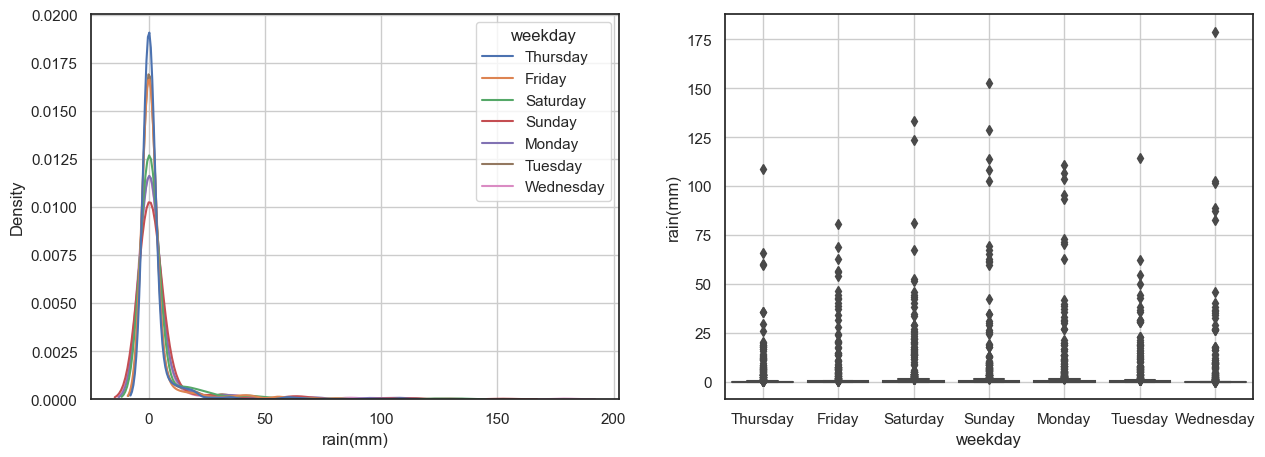

In [100]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2921.0,3.356761,12.597807,0.0,0.0,0.0,0.3,178.9


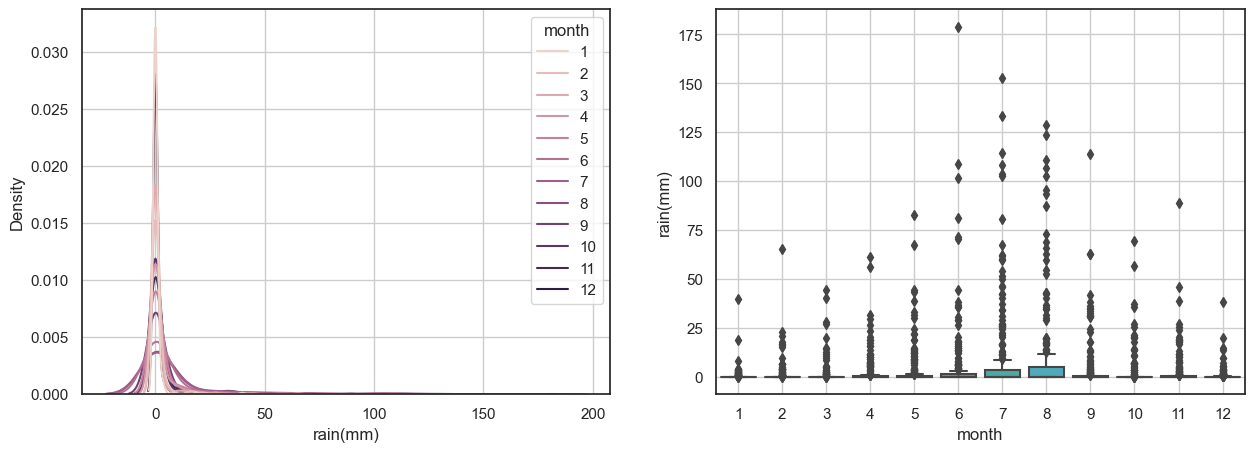

In [101]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2921.0,3.356761,12.597807,0.0,0.0,0.0,0.3,178.9


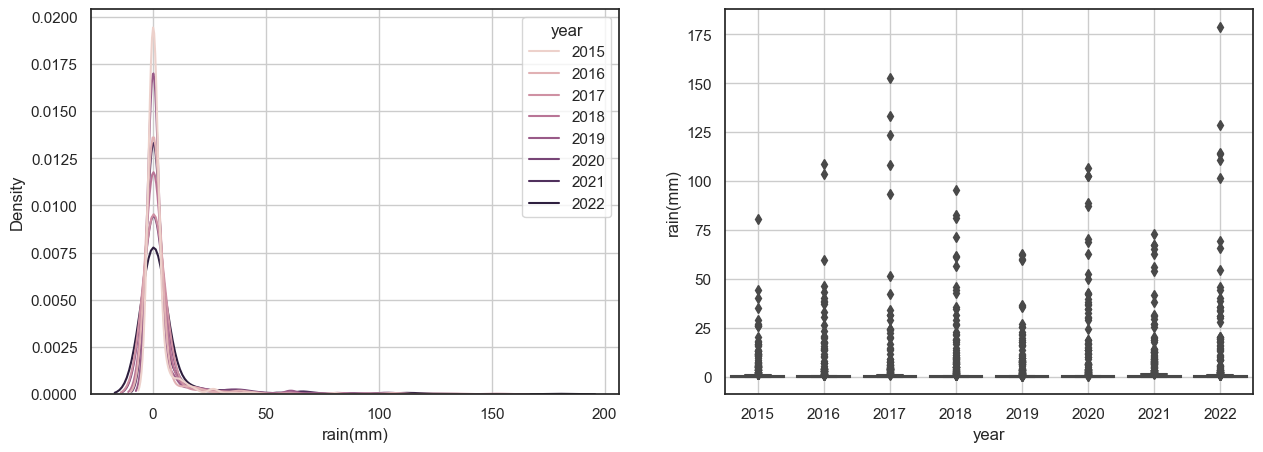

In [102]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 주말과 수요일에 강수량이 조금 많다
- 월별 : 여름에 많이 온다 (장마철 포함)
- 연도별 : 2017, 2022년에 강수량이 높다

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 공휴일 유무

,Count,Prop
0.0,2802,0.959261
1.0,119,0.040739


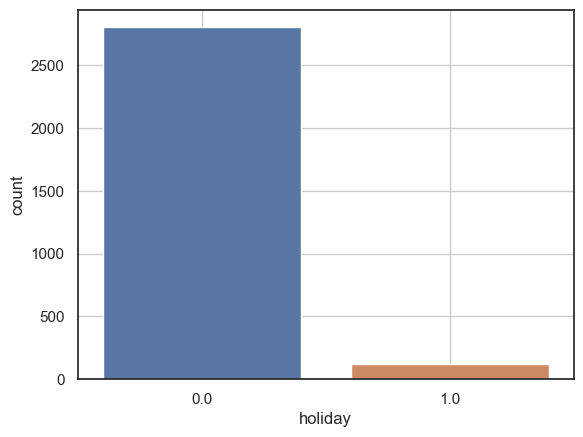

In [103]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'holiday'
eda_1_c(data, var)

- 휴일이 아닌 비율이 훨씬 많다

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

In [104]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.corr()

,car_operation,booking_count,boarding_count,avg_wait_time,avg_fare,avg_distance,target,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,year,holiday,avg_wait_time_7,boarding_rate
car_operation,1.000000,0.885836,0.904627,0.035641,-0.844823,-0.857811,0.087627,0.108709,0.109642,0.002522,0.048723,0.087955,0.076322,0.132406,0.243509,-0.258721,-0.065734,-0.028670
booking_count,0.885836,1.000000,0.988746,0.291783,-0.850456,-0.847874,0.316181,0.058275,0.054250,-0.012944,-0.014331,-0.000850,0.024185,0.090009,0.001235,-0.308071,0.188841,-0.251648
boarding_count,0.904627,0.988746,1.000000,0.184201,-0.868074,-0.858747,0.229127,0.064615,0.058540,-0.015894,-0.008583,0.005979,0.040210,0.060991,0.001355,-0.312452,0.081982,-0.117905
avg_wait_time,0.035641,0.291783,0.184201,1.000000,0.020279,-0.013169,0.732299,0.040863,0.034330,-0.005741,-0.040792,-0.087113,-0.044288,0.283033,-0.125793,-0.169203,0.842909,-0.770449
avg_fare,-0.844823,-0.850456,-0.868074,0.020279,1.000000,0.977569,-0.048772,0.083566,0.070480,0.011502,0.020689,-0.035068,0.009283,0.050612,-0.107992,0.297696,0.120718,0.008039
avg_distance,-0.857811,-0.847874,-0.858747,-0.013169,0.977569,1.000000,-0.083855,0.087728,0.073549,0.004975,0.021414,-0.039683,-0.000227,0.033090,-0.217205,0.317914,0.075994,0.048136
target,0.087627,0.316181,0.229127,0.732299,-0.048772,-0.083855,1.000000,0.044556,0.033645,0.028373,-0.036768,-0.092648,-0.042291,0.276215,-0.125696,-0.092108,0.800499,-0.588797
temp_max,0.108709,0.058275,0.064615,0.040863,0.083566,0.087728,0.044556,1.000000,0.961606,0.116899,0.306681,0.284707,0.475346,0.200621,-0.012080,-0.017199,0.041133,0.023890
temp_min,0.109642,0.054250,0.058540,0.034330,0.070480,0.073549,0.033645,0.961606,1.000000,0.201830,0.401164,0.462051,0.308519,0.231321,0.006412,-0.019697,0.032401,0.013375
rain(mm),0.002522,-0.012944,-0.015894,-0.005741,0.011502,0.004975,0.028373,0.116899,0.201830,1.000000,0.335411,0.446532,-0.285466,0.043934,0.051888,-0.010897,-0.013387,-0.004568


#### 1) 전체 상관계수 시각화

In [105]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2921 non-null   object 
 1   car_operation    2921 non-null   int64  
 2   booking_count    2921 non-null   int64  
 3   boarding_count   2921 non-null   int64  
 4   avg_wait_time    2921 non-null   float64
 5   avg_fare         2921 non-null   int64  
 6   avg_distance     2921 non-null   int64  
 7   target           2921 non-null   float64
 8   temp_max         2921 non-null   float64
 9   temp_min         2921 non-null   float64
 10  rain(mm)         2921 non-null   float64
 11  humidity_max(%)  2921 non-null   float64
 12  humidity_min(%)  2921 non-null   float64
 13  sunshine(MJ/m2)  2921 non-null   float64
 14  weekday          2921 non-null   object 
 15  month            2921 non-null   int64  
 16  season           2921 non-null   object 
 17  year          

In [107]:
data.columns

Index(['Date', 'car_operation', 'booking_count', 'boarding_count',
       'avg_wait_time', 'avg_fare', 'avg_distance', 'target', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'weekday', 'month', 'season', 'year', 'holiday',
       'avg_wait_time_7', 'boarding_rate'],
      dtype='object')

,car_operation,booking_count,boarding_count,avg_wait_time,avg_fare,avg_distance,target,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,year,holiday,avg_wait_time_7,boarding_rate
car_operation,1.0,0.885836,0.904627,0.035641,-0.844823,-0.857811,0.087627,0.108709,0.109642,0.002522,0.048723,0.087955,0.076322,0.132406,0.243509,-0.258721,-0.065734,-0.028670
booking_count,0.0,1.000000,0.988746,0.291783,-0.850456,-0.847874,0.316181,0.058275,0.054250,-0.012944,-0.014331,-0.000850,0.024185,0.090009,0.001235,-0.308071,0.188841,-0.251648
boarding_count,0.0,0.000000,1.000000,0.184201,-0.868074,-0.858747,0.229127,0.064615,0.058540,-0.015894,-0.008583,0.005979,0.040210,0.060991,0.001355,-0.312452,0.081982,-0.117905
avg_wait_time,0.0,0.000000,0.000000,1.000000,0.020279,-0.013169,0.732299,0.040863,0.034330,-0.005741,-0.040792,-0.087113,-0.044288,0.283033,-0.125793,-0.169203,0.842909,-0.770449
avg_fare,-0.0,-0.000000,-0.000000,0.000000,1.000000,0.977569,-0.048772,0.083566,0.070480,0.011502,0.020689,-0.035068,0.009283,0.050612,-0.107992,0.297696,0.120718,0.008039
avg_distance,-0.0,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.083855,0.087728,0.073549,0.004975,0.021414,-0.039683,-0.000227,0.033090,-0.217205,0.317914,0.075994,0.048136
target,0.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.044556,0.033645,0.028373,-0.036768,-0.092648,-0.042291,0.276215,-0.125696,-0.092108,0.800499,-0.588797
temp_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.961606,0.116899,0.306681,0.284707,0.475346,0.200621,-0.012080,-0.017199,0.041133,0.023890
temp_min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.201830,0.401164,0.462051,0.308519,0.231321,0.006412,-0.019697,0.032401,0.013375
rain(mm),0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.335411,0.446532,-0.285466,0.043934,0.051888,-0.010897,-0.013387,-0.004568


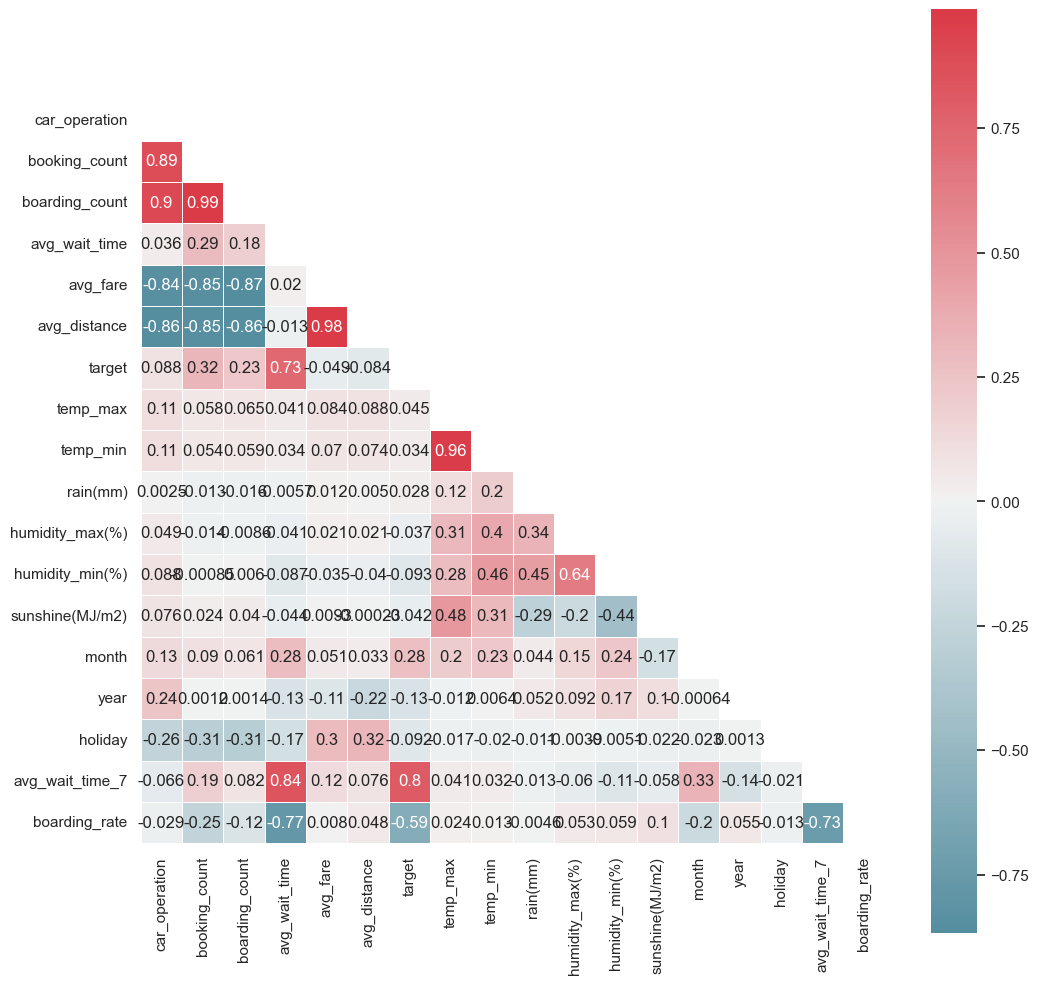

In [108]:
num_vars = ['car_operation', 'booking_count', 'boarding_count',
       'avg_wait_time', 'avg_fare', 'avg_distance', 'target', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'month', 'year', 'holiday', 'avg_wait_time_7', 'boarding_rate']

eda_2_corr(data, num_vars)

- 상관계수 높은 변수 : 평균 대기 시간, 이동시간 7일 평균, 탑승률

- 약간 높음 : 접수건수, 탐승건수, 월

- 낮음 : 나머지

#### 2) 산점도

In [109]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* 평균 대기 시간

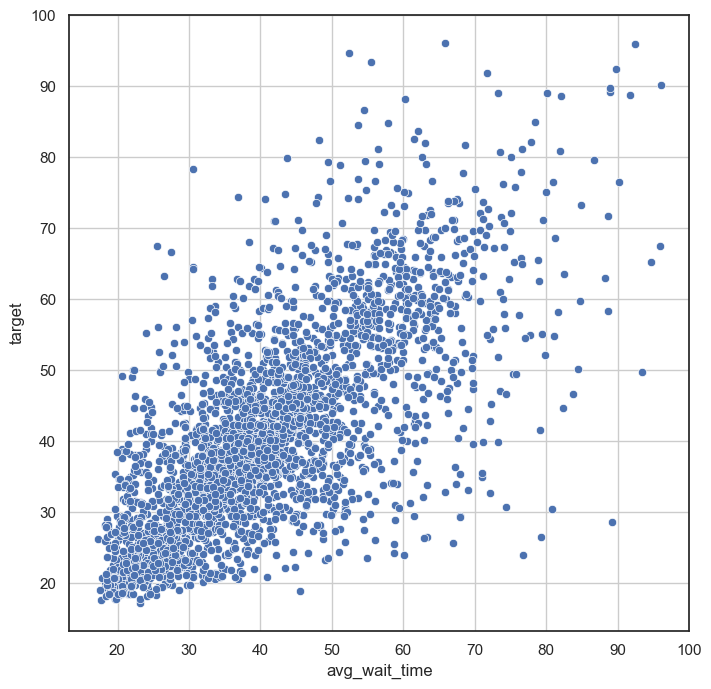

In [110]:
eda_2_nn(data, 'target', 'avg_wait_time')

* 7일 평균

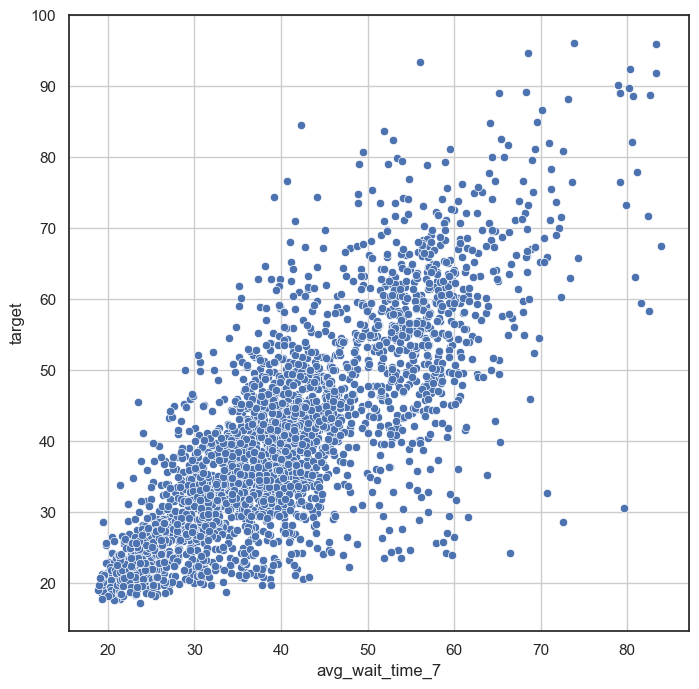

In [111]:
eda_2_nn(data, 'target', 'avg_wait_time_7')

- 탑승률

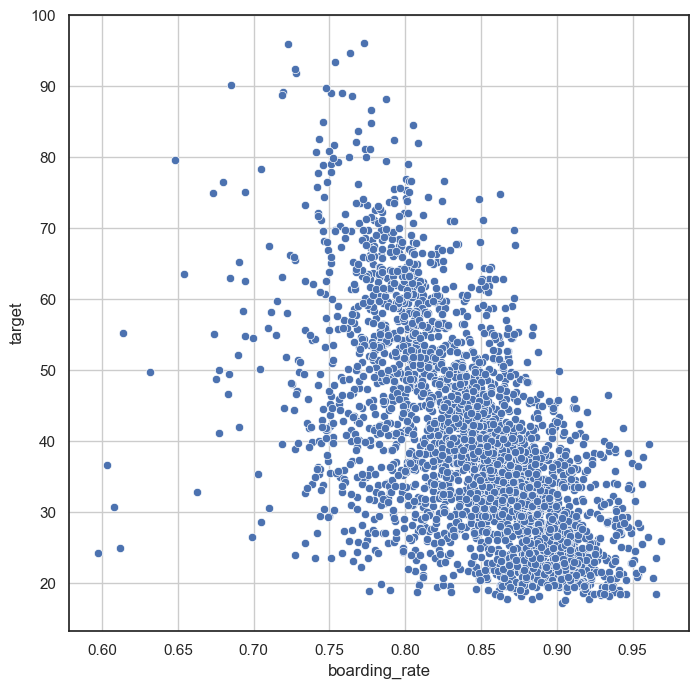

In [113]:
eda_2_nn(data, 'target', 'boarding_rate')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 휴일 여부

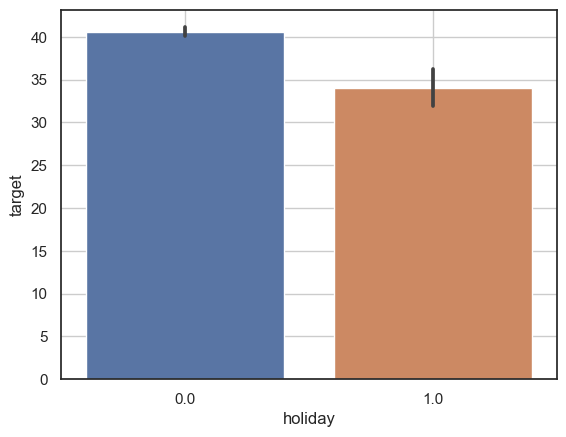

In [114]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.barplot(x = 'holiday', y = 'target', data = data)
plt.grid()
plt.show()

In [115]:
# t-test
h0 = data.loc[data['holiday']==0, 'target']
h1 = data.loc[data['holiday']==1, 'target']
spst.ttest_ind(h0, h1)

Ttest_indResult(statistic=4.99765770730323, pvalue=6.145444639480913e-07)

휴일과 평균 대기시간은 관련이 있다

* 요일

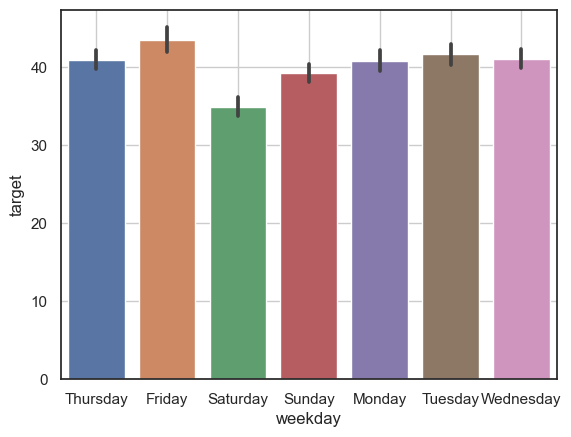

In [116]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.barplot(x = 'weekday', y = 'target', data = data)
plt.grid()
plt.show()

In [117]:
# anova
temp = data.loc[data['weekday'].notnull()]

w0 = temp.loc[temp['weekday']=='Monday', 'target']
w1 = temp.loc[temp['weekday']=='Tuesday', 'target']
w2 = temp.loc[temp['weekday']=='Wednesday', 'target']
w3 = temp.loc[temp['weekday']=='Thursday', 'target']
w4 = temp.loc[temp['weekday']=='Friday', 'target']
w5 = temp.loc[temp['weekday']=='Saturday', 'target']
w6 = temp.loc[temp['weekday']=='Sunday', 'target']

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=15.709598754374598, pvalue=7.824951103498204e-18)

요일에 따라서 대기시간의 차이가 크다

* 계절

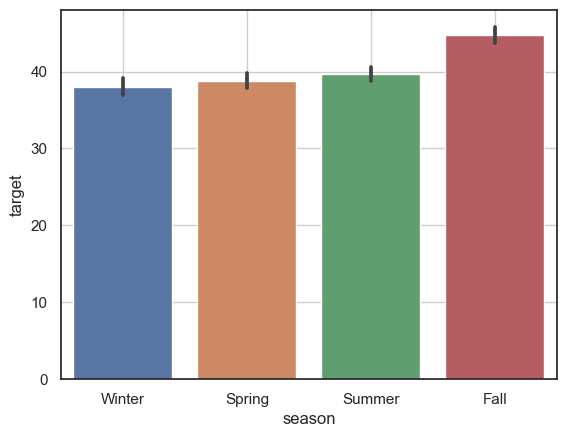

In [118]:
sns.barplot(x = 'season', y = 'target', data = data)
plt.grid()
plt.show()

In [119]:
# anova
temp = data.loc[data['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', 'target']
s1 = temp.loc[temp['season']=='Summer', 'target']
s2 = temp.loc[temp['season']=='Fall', 'target']
s3 = temp.loc[temp['season']=='Winter', 'target']

spst.f_oneway(s0,s1,s2,s3)

F_onewayResult(statistic=35.02524244911058, pvalue=3.116240365654587e-22)

계절에 따라 대기시간에 큰 차이가 있다

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [5]:
data.columns

Index(['Date', 'car_operation', 'booking_count', 'boarding_count',
       'avg_wait_time', 'avg_fare', 'avg_distance', 'target', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'weekday', 'month', 'season', 'year', 'holiday',
       'avg_wait_time_7', 'boarding_rate'],
      dtype='object')

In [6]:
strong_feature = ['avg_wait_time', 'avg_wait_time_7', 'boarding_rate'] # 평균 대기시간, 대기시간 7일 평균, 탑승률

* 중간(약한) 관계의 변수

In [7]:
middle_feature = ['booking_count', 'boarding_count', 'holiday', 'month',  'weekday', 'season'] # 접수건수, 탐승건수, 휴일, 월, 요일, 계절

* (거의) 관계가 없는 변수

In [8]:
weak_feature = ['Date', 'car_operation','avg_fare', 'avg_distance', 'temp_max',
                       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
                       'sunshine(MJ/m2)', 'year']

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2921 non-null   object 
 1   car_operation    2921 non-null   int64  
 2   booking_count    2921 non-null   int64  
 3   boarding_count   2921 non-null   int64  
 4   avg_wait_time    2921 non-null   float64
 5   avg_fare         2921 non-null   int64  
 6   avg_distance     2921 non-null   int64  
 7   target           2921 non-null   float64
 8   temp_max         2921 non-null   float64
 9   temp_min         2921 non-null   float64
 10  rain(mm)         2921 non-null   float64
 11  humidity_max(%)  2921 non-null   float64
 12  humidity_min(%)  2921 non-null   float64
 13  sunshine(MJ/m2)  2921 non-null   float64
 14  weekday          2921 non-null   object 
 15  month            2921 non-null   int64  
 16  season           2921 non-null   object 
 17  year          

강한 + 중간 관계 변수만 추출

In [13]:
data = data[['Date'] + strong_feature + middle_feature + ['target']]
data.head()

,Date,avg_wait_time,avg_wait_time_7,boarding_rate,booking_count,boarding_count,holiday,month,weekday,season,target
0,2015-01-01,23.2,23.657143,0.903226,1023,924,1.0,1,Thursday,Winter,17.2
1,2015-01-02,17.2,23.657143,0.898987,3158,2839,0.0,1,Friday,Winter,26.2
2,2015-01-03,26.2,23.657143,0.918689,1648,1514,0.0,1,Saturday,Winter,24.5
3,2015-01-04,24.5,23.657143,0.927096,1646,1526,0.0,1,Sunday,Winter,26.2
4,2015-01-05,26.2,23.657143,0.877647,4250,3730,0.0,1,Monday,Winter,23.6


In [14]:
data.tail(91)

,Date,avg_wait_time,avg_wait_time_7,boarding_rate,booking_count,boarding_count,holiday,month,weekday,season,target
2830,2022-10-01,50.6,44.057143,0.805775,2528,2037,0.0,10,Saturday,Fall,36.4
2831,2022-10-02,36.4,44.200000,0.842894,1935,1631,0.0,10,Sunday,Fall,24.9
2832,2022-10-03,24.9,41.257143,0.804921,1707,1374,1.0,10,Monday,Fall,41.0
2833,2022-10-04,41.0,40.885714,0.838764,5923,4968,0.0,10,Tuesday,Fall,48.4
2834,2022-10-05,48.4,41.414286,0.834178,5916,4935,0.0,10,Wednesday,Fall,46.5
...,...,...,...,...,...,...,...,...,...,...,...
2916,2022-12-26,39.2,43.485714,0.828983,5555,4605,0.0,12,Monday,Winter,44.4
2917,2022-12-27,44.4,42.771429,0.825909,5635,4654,0.0,12,Tuesday,Winter,44.8
2918,2022-12-28,44.8,43.514286,0.822073,5654,4648,0.0,12,Wednesday,Winter,52.5
2919,2022-12-29,52.5,42.957143,0.808952,5250,4247,0.0,12,Thursday,Winter,38.3


In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.to_csv('data2.csv', index=False)